# Installing Libraries

In [1]:
pip install pandas

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

# Importing Libraries

In [9]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
df=pd.read_excel("C:\\Users\\91901\\OneDrive\\Desktop\\nlp project\\Datasets\\New_Mentalhealth.xlsx")

In [12]:
df

,types,complaints,Commnet
0,Stress/Anxiety,How do I overcome my anxierty and depression?,NaN
1,Substance Abuse/Addiction,How can I rebuild the trust I destroyed from m...,NaN
2,Marriage,I'm going through depression right now and my ...,NaN
3,Stress/Anxiety,How do I talk to my girlfriend about my anxiet...,NaN
4,Relationship Dissolution,My fiancÃ©'s ex-husband shows up unannounced,NaN
...,...,...,...
1266,Stress/Anxiety,Anxiety about the passage of time,NaN
1267,Family Conflict,My parents are both refusing any Covid vaccine...,NaN
1268,Workplace issues,What to do about a boss that cannot stop lying,NaN
1269,Family Conflict,How do I (21F) stop my parents (50F & 51M) fro...,NaN


In [13]:
df=df.drop_duplicates(subset='complaints', keep='last')
df

,types,complaints,Commnet
0,Stress/Anxiety,How do I overcome my anxierty and depression?,NaN
2,Marriage,I'm going through depression right now and my ...,NaN
3,Stress/Anxiety,How do I talk to my girlfriend about my anxiet...,NaN
4,Relationship Dissolution,My fiancÃ©'s ex-husband shows up unannounced,NaN
5,Behavioral Change,How do I stop sneaking away from home at night?,NaN
...,...,...,...
1266,Stress/Anxiety,Anxiety about the passage of time,NaN
1267,Family Conflict,My parents are both refusing any Covid vaccine...,NaN
1268,Workplace issues,What to do about a boss that cannot stop lying,NaN
1269,Family Conflict,How do I (21F) stop my parents (50F & 51M) fro...,NaN


In [14]:
df['types'].value_counts()

Relationships                186
Stress/Anxiety                97
Depression                    91
Intimacy                      80
Social Relationships          75
Family Conflict               72
Anger Management              70
Trauma/Grief/Loss             69
LGBTQ                         55
Parenting                     54
Marriage                      50
Substance Abuse/Addiction     50
Sleep Improvement             50
Self-esteem                   49
Workplace issues              49
Behavioral Change             42
Relationship Dissolution      37
Counseling Fundamentals       33
Name: types, dtype: int64

# Data Visualization

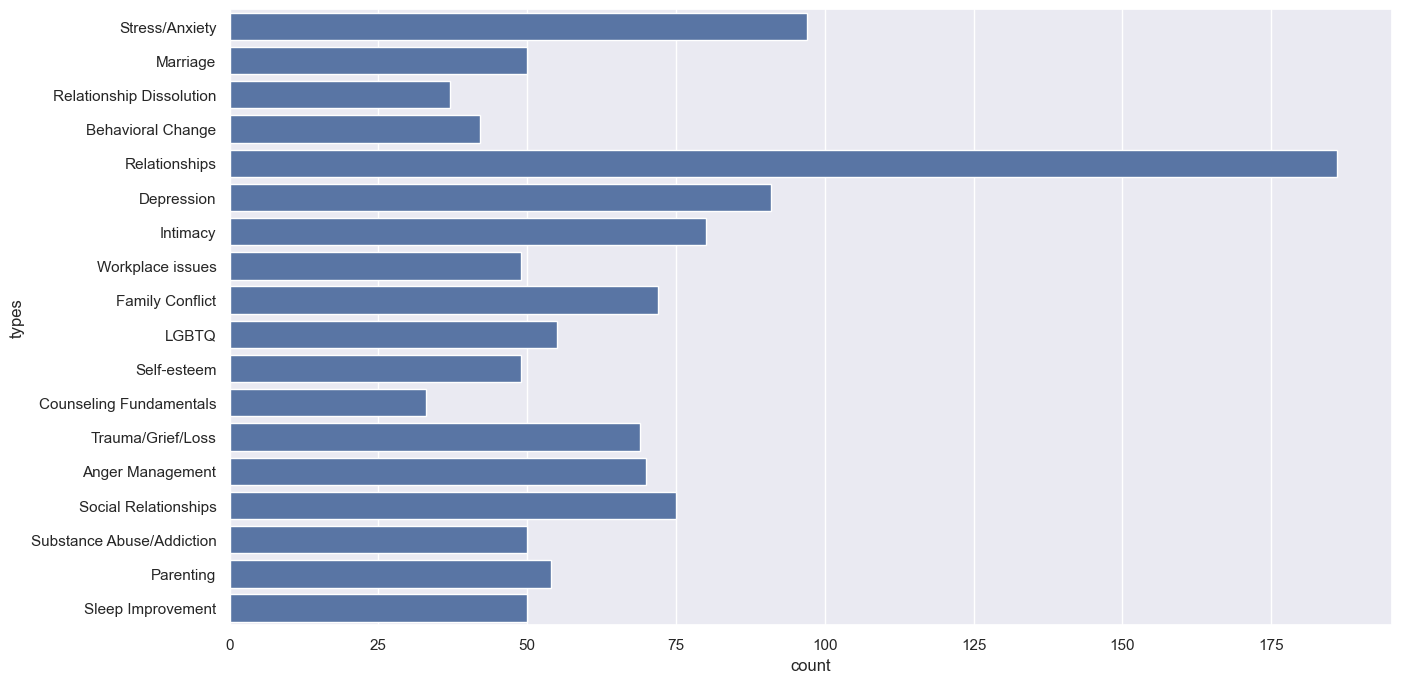

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="types", data=df)

# Text Preprocessing 

In [16]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import FreqDist, pos_tag
from nltk.corpus import wordnet
import string
stop_words = list(stopwords.words('english'))

stop_words.extend(["ex","husband","wife","girl","boy","n't",'thank','get','please','san','diego','hi','hello','im','wa','ha','ive','would','like','know','also','let',
                   '2020','name','one','yet','june','said','two','aug','oct','jan','dec','july','-','january','april','robert','etc','nov','mesa','brown','andrew','jean','kim'])

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
def pre_pro_x(a):
    a = str(a).lower()
    a = re.sub('[0-9]+',' ',a) 
    #removing punctuations
    a = a.replace('[^\w\s]', '')
    a = a.replace('\d+', '')
    #tokenization and lemmatization
    lemmatizer = WordNetLemmatizer()
    a = [lemmatizer.lemmatize(item,get_wordnet_pos(item)) for item in word_tokenize(a) 
                          if item not in stop_words]
    a = [i for i in a if len(i)>2]                     
    a = ' '.join(a)
    #X = X.apply(lambda x: lemmatize(x))
    #X = X.apply(lambda x: ' '.join([str(st)[str(st).index("'")+1:str(st).index('/')] for st in x]))
    return a

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
df['cleanmsg']= df['complaints'].apply(pre_pro_x)
df

C:\Users\91901\AppData\Local\Temp\ipykernel_5392\1348237288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleanmsg']= df['complaints'].apply(pre_pro_x)


,types,complaints,Commnet,cleanmsg
0,Stress/Anxiety,How do I overcome my anxierty and depression?,NaN,overcome anxierty depression
2,Marriage,I'm going through depression right now and my ...,NaN,depression right relationship suffer
3,Stress/Anxiety,How do I talk to my girlfriend about my anxiet...,NaN,talk girlfriend anxiety
4,Relationship Dissolution,My fiancÃ©'s ex-husband shows up unannounced,NaN,fiancã© ex-husband show unannounced
5,Behavioral Change,How do I stop sneaking away from home at night?,NaN,stop sneak away home night
...,...,...,...,...
1266,Stress/Anxiety,Anxiety about the passage of time,NaN,anxiety passage time
1267,Family Conflict,My parents are both refusing any Covid vaccine...,NaN,parent refuse covid vaccine wildly different r...
1268,Workplace issues,What to do about a boss that cannot stop lying,NaN,bos stop lie
1269,Family Conflict,How do I (21F) stop my parents (50F & 51M) fro...,NaN,stop parent comment eat habit


In [18]:
df.to_csv("Cleanedmh.csv")

# Label Encoding Categories

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['topic_encoding'] = labelencoder.fit_transform(df['types'])
df

C:\Users\91901\AppData\Local\Temp\ipykernel_5392\50257439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_encoding'] = labelencoder.fit_transform(df['types'])


,types,complaints,Commnet,cleanmsg,topic_encoding
0,Stress/Anxiety,How do I overcome my anxierty and depression?,NaN,overcome anxierty depression,14
2,Marriage,I'm going through depression right now and my ...,NaN,depression right relationship suffer,7
3,Stress/Anxiety,How do I talk to my girlfriend about my anxiet...,NaN,talk girlfriend anxiety,14
4,Relationship Dissolution,My fiancÃ©'s ex-husband shows up unannounced,NaN,fiancã© ex-husband show unannounced,9
5,Behavioral Change,How do I stop sneaking away from home at night?,NaN,stop sneak away home night,1
...,...,...,...,...,...
1266,Stress/Anxiety,Anxiety about the passage of time,NaN,anxiety passage time,14
1267,Family Conflict,My parents are both refusing any Covid vaccine...,NaN,parent refuse covid vaccine wildly different r...,4
1268,Workplace issues,What to do about a boss that cannot stop lying,NaN,bos stop lie,17
1269,Family Conflict,How do I (21F) stop my parents (50F & 51M) fro...,NaN,stop parent comment eat habit,4


In [20]:
print(labelencoder.classes_)

['Anger Management' 'Behavioral Change' 'Counseling Fundamentals'
 'Depression' 'Family Conflict' 'Intimacy' 'LGBTQ' 'Marriage' 'Parenting'
 'Relationship Dissolution' 'Relationships' 'Self-esteem'
 'Sleep Improvement' 'Social Relationships' 'Stress/Anxiety'
 'Substance Abuse/Addiction' 'Trauma/Grief/Loss' 'Workplace issues']


In [21]:
df['topic_encoding'].nunique()

18

# Feature Extraction Using TF-IDF

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df["cleanmsg"],df["topic_encoding"], test_size = 0.33, random_state = 42)
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer    
count_vect = CountVectorizer(ngram_range=(1,3))               #set it to ngram (1,3)
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [23]:
print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, x_train.shape)

(810, 6630) (399, 6630) (810,) (810,)


In [24]:
cls7=['Anger Management' ,'Behavioral Change', 'Counseling Fundamentals',
 'Depression' ,'Family Conflict' ,'Intimacy', 'LGBTQ',
 'Marriage', 'Parenting', 'Relationship Dissolution', 'Relationships',
 'Self-esteem' ,'Sleep Improvement' ,'Social Relationships' ,'Stress/Anxiety',
 'Substance Abuse/Addiction' ,'Trauma/Grief/Loss', 'Workplace issues']

# SVM -Best Predicted Model

In [25]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
model_svm = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True,class_weight='balanced' )
model_svm.fit(x_train_tfidf,y_train)
# predict the labels on validation dataset
predictions_SVM = model_svm.predict(x_test_tfidf)
# print(confusion_matrix(y_test,predictions_SVM))
print(classification_report(y_test,predictions_SVM))
print(accuracy_score(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.57      0.29      0.38        14
           2       0.89      0.80      0.84        10
           3       0.45      0.39      0.42        36
           4       0.36      0.43      0.39        21
           5       0.47      0.38      0.42        24
           6       0.62      0.59      0.61        17
           7       0.35      0.43      0.39        14
           8       0.53      0.56      0.54        18
           9       0.29      0.22      0.25         9
          10       0.42      0.69      0.52        67
          11       0.26      0.26      0.26        19
          12       0.92      0.69      0.79        16
          13       0.44      0.57      0.50        28
          14       0.65      0.42      0.52        40
          15       1.00      0.42      0.59        12
          16       0.86      0.55      0.67        22
          17       0.91    

In [26]:
scores_1 = cross_val_score(model_svm, x_train_tfidf,y_train, cv=5)   #3 fold validation
print(accuracy_score(y_test,predictions_SVM))
print ("Cross-validated scores:", scores_1)

0.518796992481203
Cross-validated scores: [0.36419753 0.34567901 0.39506173 0.50617284 0.40740741]


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'Anger Management'),
  Text(1.5, 0, 'Behavioral Change'),
  Text(2.5, 0, 'Counseling Fundamentals'),
  Text(3.5, 0, 'Depression'),
  Text(4.5, 0, 'Family Conflict'),
  Text(5.5, 0, 'Intimacy'),
  Text(6.5, 0, 'LGBTQ'),
  Text(7.5, 0, 'Marriage'),
  Text(8.5, 0, 'Parenting'),
  Text(9.5, 0, 'Relationship Dissolution'),
  Text(10.5, 0, 'Relationships'),
  Text(11.5, 0, 'Self-esteem'),
  Text(12.5, 0, 'Sleep Improvement'),
  Text(13.5, 0, 'Social Relationships'),
  Text(14.5, 0, 'Stress/Anxiety'),
  Text(15.5, 0, 'Substance Abuse/Addiction'),
  Text(16.5, 0, 'Trauma/Grief/Loss'),
  Text(17.5, 0, 'Workplace issues')])

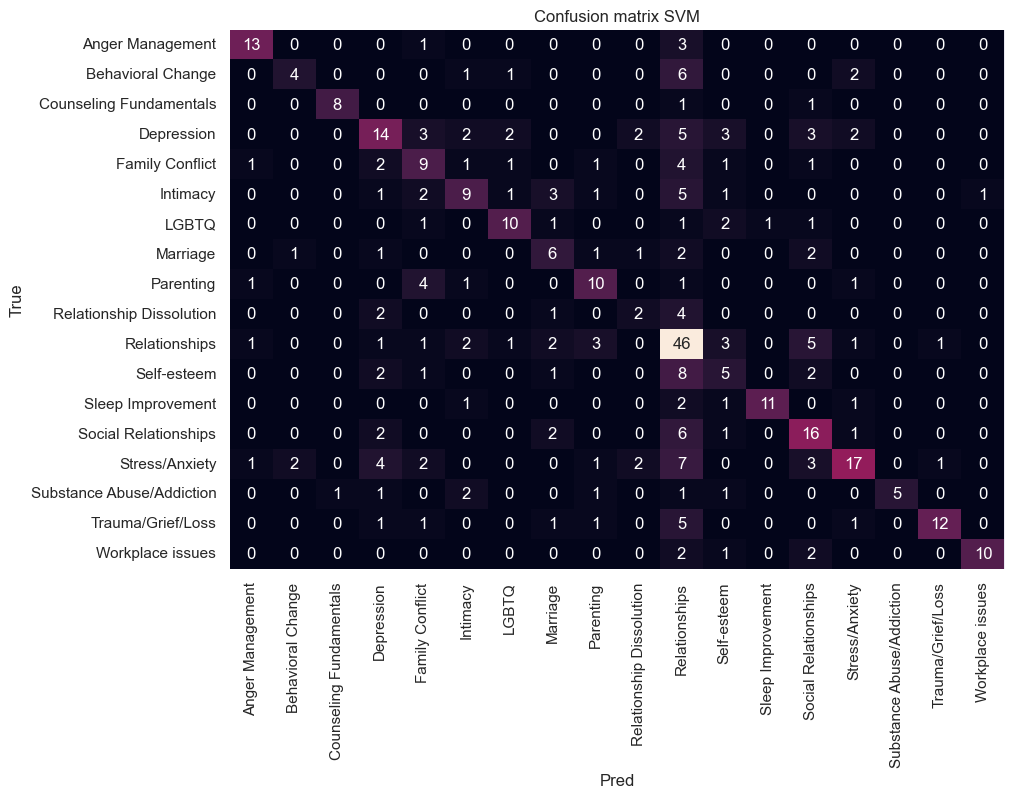

In [27]:
import seaborn as sns
cm=confusion_matrix(y_test,predictions_SVM)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=cls7, yticklabels=cls7, title="Confusion matrix SVM")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Downloading Pickle files

In [28]:
import pickle
pickle.dump(model_svm, open('model_svm.pkl', 'wb'))
pickle.dump(count_vect, open('count_vect_svm.pkl', 'wb'))
pickle.dump(transformer, open('transformer_svm.pkl', 'wb'))

# Other Models Tested

# Grid-Searching With Best Model -SVM

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train_tfidf, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.142 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.148 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.148 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.148 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.148 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.142 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.148 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.148 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.148 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.148 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.142 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [31]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [32]:
grid_predictions = grid.predict(x_test_tfidf)
 
# print classification report
print(classification_report(y_test, grid_predictions))
print(accuracy_score(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.67      0.29      0.40        14
           2       0.89      0.80      0.84        10
           3       0.43      0.42      0.42        36
           4       0.39      0.43      0.41        21
           5       0.41      0.38      0.39        24
           6       0.62      0.59      0.61        17
           7       0.38      0.43      0.40        14
           8       0.59      0.56      0.57        18
           9       0.29      0.22      0.25         9
          10       0.43      0.73      0.54        67
          11       0.28      0.26      0.27        19
          12       0.91      0.62      0.74        16
          13       0.48      0.57      0.52        28
          14       0.62      0.50      0.56        40
          15       0.83      0.42      0.56        12
          16       1.00      0.36      0.53        22
          17       0.89    

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'Anger Management'),
  Text(1.5, 0, 'Behavioral Change'),
  Text(2.5, 0, 'Counseling Fundamentals'),
  Text(3.5, 0, 'Depression'),
  Text(4.5, 0, 'Family Conflict'),
  Text(5.5, 0, 'Intimacy'),
  Text(6.5, 0, 'LGBTQ'),
  Text(7.5, 0, 'Marriage'),
  Text(8.5, 0, 'Parenting'),
  Text(9.5, 0, 'Relationship Dissolution'),
  Text(10.5, 0, 'Relationships'),
  Text(11.5, 0, 'Self-esteem'),
  Text(12.5, 0, 'Sleep Improvement'),
  Text(13.5, 0, 'Social Relationships'),
  Text(14.5, 0, 'Stress/Anxiety'),
  Text(15.5, 0, 'Substance Abuse/Addiction'),
  Text(16.5, 0, 'Trauma/Grief/Loss'),
  Text(17.5, 0, 'Workplace issues')])

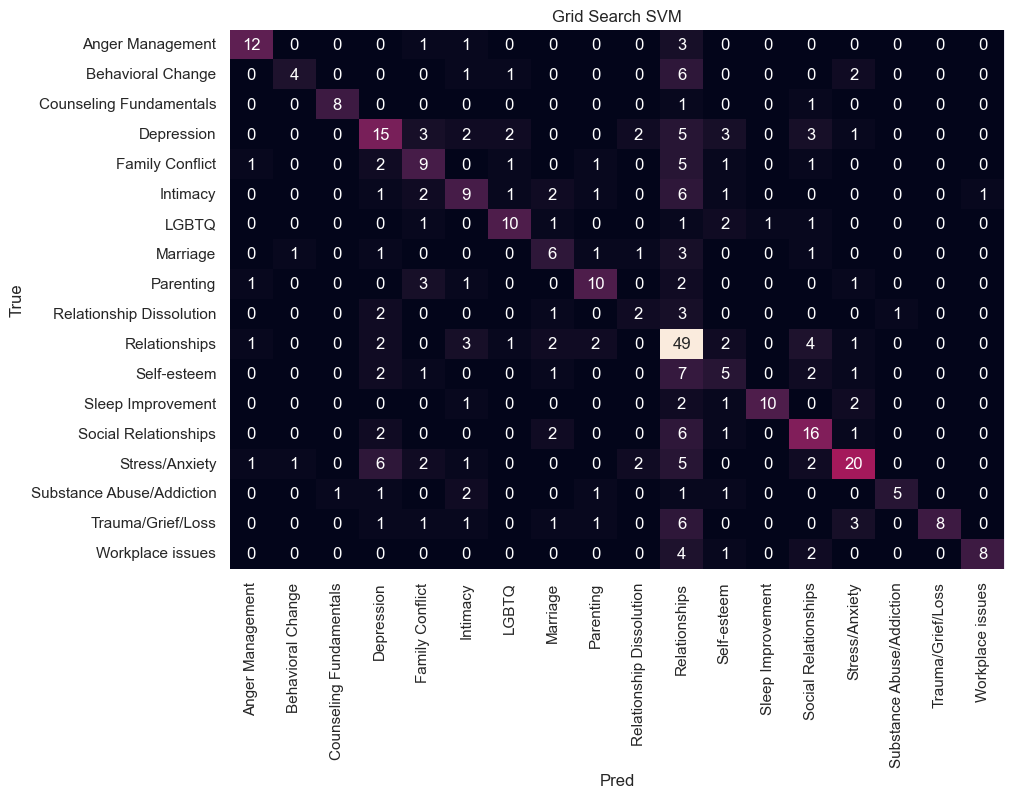

In [33]:
import seaborn as sns
cm=confusion_matrix(y_test, grid_predictions)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=cls7, yticklabels=cls7, title="Grid Search SVM")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Ensembling SVM with AdaBoosters

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
model_13= AdaBoostClassifier(SGDClassifier(loss='hinge'), algorithm='SAMME', learning_rate=0.5, n_estimators=300)
model_13.fit(x_train_tfidf, y_train)                                                   
y_pred13 = model_13.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred13))
print(classification_report(y_test, y_pred13))

0.3233082706766917
              precision    recall  f1-score   support

           0       0.78      0.41      0.54        17
           1       0.75      0.21      0.33        14
           2       1.00      0.20      0.33        10
           3       0.55      0.31      0.39        36
           4       0.12      0.05      0.07        21
           5       0.67      0.25      0.36        24
           6       1.00      0.35      0.52        17
           7       0.80      0.29      0.42        14
           8       1.00      0.17      0.29        18
           9       0.05      0.44      0.09         9
          10       0.54      0.57      0.55        67
          11       0.09      0.63      0.15        19
          12       1.00      0.38      0.55        16
          13       0.31      0.14      0.20        28
          14       0.87      0.33      0.47        40
          15       1.00      0.25      0.40        12
          16       0.83      0.23      0.36        22
        

In [35]:
scores_13 = cross_val_score(model_13, x_train_tfidf,y_train, cv=3)   #3 fold validation
print(accuracy_score(y_test,y_pred13))
print ("Cross-validated scores:", scores_13)

0.3233082706766917
Cross-validated scores: [0.13703704 0.10740741 0.12962963]


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'Anger Management'),
  Text(1.5, 0, 'Behavioral Change'),
  Text(2.5, 0, 'Counseling Fundamentals'),
  Text(3.5, 0, 'Depression'),
  Text(4.5, 0, 'Family Conflict'),
  Text(5.5, 0, 'Intimacy'),
  Text(6.5, 0, 'LGBTQ'),
  Text(7.5, 0, 'Marriage'),
  Text(8.5, 0, 'Parenting'),
  Text(9.5, 0, 'Relationship Dissolution'),
  Text(10.5, 0, 'Relationships'),
  Text(11.5, 0, 'Self-esteem'),
  Text(12.5, 0, 'Sleep Improvement'),
  Text(13.5, 0, 'Social Relationships'),
  Text(14.5, 0, 'Stress/Anxiety'),
  Text(15.5, 0, 'Substance Abuse/Addiction'),
  Text(16.5, 0, 'Trauma/Grief/Loss'),
  Text(17.5, 0, 'Workplace issues')])

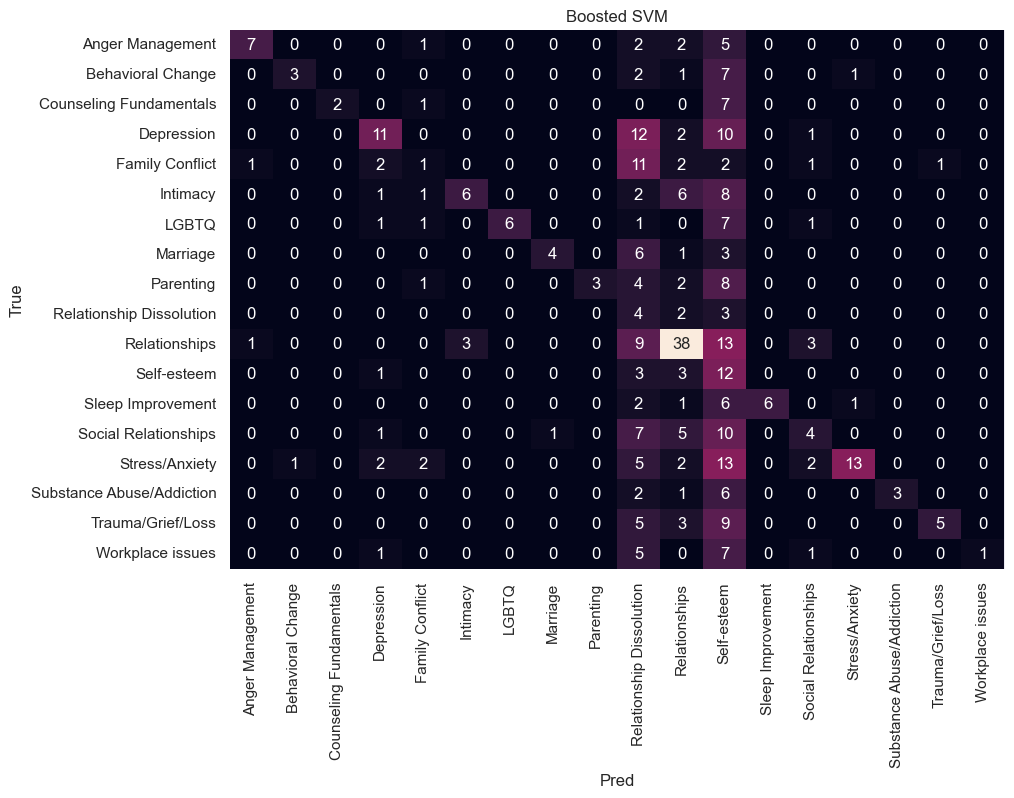

In [36]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred13)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=cls7, yticklabels=cls7, title="Boosted SVM")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# LSTM

In [37]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model


In [38]:
X = df['cleanmsg']
y = df['topic_encoding']

# Split data into train , test
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
print('Shape of X_train : ' , X_train.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_test : ',y_test.shape)

Shape of X_train :  (967,)
Shape of y_train :  (967,)
Shape of X_test :  (242,)
Shape of y_test :  (242,)


In [40]:
y_train = to_categorical(y_train,dtype ="uint8")
y_test  = to_categorical(y_test,dtype ="uint8")

In [41]:
df["len_msg"] = df["cleanmsg"].str.len()

C:\Users\91901\AppData\Local\Temp\ipykernel_5392\1707422324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len_msg"] = df["cleanmsg"].str.len()


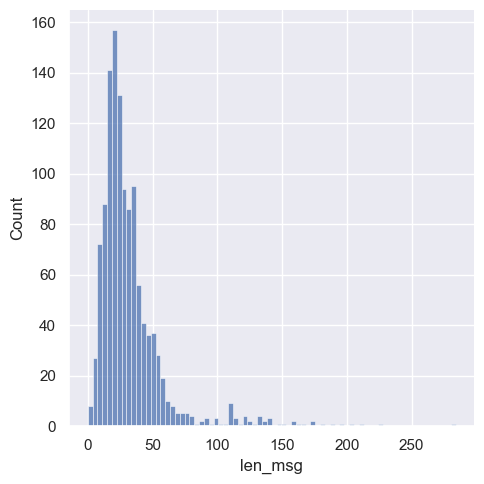

In [42]:
data = df['len_msg']

# Generate histogram/distribution plot
sns.displot(data)

plt.show()

In [43]:
# Tokenize Texts
max_features = 9000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)

In [44]:
# convert tokenized texts into same padding size
maxlen = 80
embed_size = 128 
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [45]:
# Create Model  
inp = Input(shape=(maxlen, )) 
x   =  Embedding(max_features, embed_size)(inp)
x   =  LSTM(60, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(18, activation="softmax")(x)

In [46]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80)]              0         
                                                                 
 embedding (Embedding)       (None, 80, 128)           1152000   
                                                                 
 lstm_layer (LSTM)           (None, 80, 60)            45360     
                                                                 
 global_max_pooling1d (Glob  (None, 60)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                3904      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                            

In [47]:
model.fit(X_train_final,y_train, epochs=15,validation_data=(X_test_final,y_test))

Epoch 1/15


31/31 [==============================] - 9s 93ms/step - loss: 2.8587 - accuracy: 0.1334 - val_loss: 2.8220 - val_accuracy: 0.1364
Epoch 2/15
31/31 [==============================] - 1s 47ms/step - loss: 2.8029 - accuracy: 0.1531 - val_loss: 2.8089 - val_accuracy: 0.1364
Epoch 3/15
31/31 [==============================] - 1s 46ms/step - loss: 2.7968 - accuracy: 0.1593 - val_loss: 2.7964 - val_accuracy: 0.1364
Epoch 4/15
31/31 [==============================] - 1s 49ms/step - loss: 2.7577 - accuracy: 0.1582 - val_loss: 2.7523 - val_accuracy: 0.1364
Epoch 5/15
31/31 [==============================] - 1s 47ms/step - loss: 2.6496 - accuracy: 0.1789 - val_loss: 2.6497 - val_accuracy: 0.1405
Epoch 6/15
31/31 [==============================] - 2s 51ms/step - loss: 2.3635 - accuracy: 0.2771 - val_loss: 2.4440 - val_accuracy: 0.2479
Epoch 7/15
31/31 [==============================] - 2s 52ms/step - loss: 1.9977 - accuracy: 0.4168 - val_loss: 2.2791 - val_accuracy: 0.3223
Epoch 8/15


In [48]:
model.evaluate(X_test_final,y_test)

8/8 [==============================] - 0s 17ms/step - loss: 2.3365 - accuracy: 0.4215


[2.3364644050598145, 0.42148759961128235]

In [49]:
import numpy as np
lstm_pred = np.round(model.predict(X_test_final))

8/8 [==============================] - 1s 14ms/step


In [50]:
# Precision , Recall , F1-score
cr = classification_report(y_test,lstm_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.43      0.57        14
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.69      0.42      0.52        26
           4       0.60      0.19      0.29        16
           5       0.40      0.21      0.28        19
           6       0.50      0.62      0.56         8
           7       0.00      0.00      0.00        10
           8       0.67      0.40      0.50        15
           9       1.00      0.17      0.29         6
          10       0.48      0.45      0.47        33
          11       1.00      0.14      0.25         7
          12       1.00      0.17      0.29         6
          13       0.43      0.20      0.27        15
          14       0.37      0.41      0.39        17
          15       0.50      0.50      0.50        10
          16       0.50      0.38      0.43        13
          17       0.62    

c:\Users\91901\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91901\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Testing Model Prediction

In [53]:
# complaint=[]
# for index in x_test.index:
#     query=df.loc[df.index[index]]
#     complaint.append(query)

In [52]:
complaint

[types                                               Family Conflict
 complaints        My husband is harsh towards our son and threat...
 Commnet                                                         NaN
 cleanmsg                                 harsh towards son threaten
 topic_encoding                                                    4
 len_msg                                                          26
 Name: 117, dtype: object,
 types                                          Social Relationships
 complaints        Is there something I should do to help my frie...
 Commnet                                                         NaN
 cleanmsg                 something help friend abusive relationship
 topic_encoding                                                   13
 len_msg                                                          42
 Name: 497, dtype: object,
 types                                                 Relationships
 complaints        I feel like I could never be w

In [54]:
cdf=pd.DataFrame(complaint)

In [56]:
cdf['true label']=y_test
cdf['predict label']==predict_label

ValueError: Length of values (242) does not match length of index (32)

In [57]:
predict_label=[]
for i in predictions_SVM:
    a=cls7[i]
    print(a,i)
    predict_label.append(a)

Substance Abuse/Addiction 15
LGBTQ 6
Marriage 7
Family Conflict 4
Family Conflict 4
Relationships 10
Depression 3
Relationships 10
Relationships 10
Social Relationships 13
Counseling Fundamentals 2
LGBTQ 6
Stress/Anxiety 14
Anger Management 0
Anger Management 0
Social Relationships 13
Depression 3
Social Relationships 13
Intimacy 5
Depression 3
Stress/Anxiety 14
Anger Management 0
Sleep Improvement 12
Self-esteem 11
Stress/Anxiety 14
Relationships 10
Social Relationships 13
Social Relationships 13
Parenting 8
Social Relationships 13
Social Relationships 13
Intimacy 5
Relationships 10
LGBTQ 6
Self-esteem 11
Workplace issues 17
Depression 3
Relationships 10
Relationships 10
LGBTQ 6
Social Relationships 13
Relationships 10
Counseling Fundamentals 2
Relationships 10
Trauma/Grief/Loss 16
Family Conflict 4
Substance Abuse/Addiction 15
Parenting 8
Family Conflict 4
Trauma/Grief/Loss 16
Family Conflict 4
Stress/Anxiety 14
Relationship Dissolution 9
Relationships 10
Family Conflict 4
Intimacy 5

In [58]:
cdf

,types,complaints,Commnet,cleanmsg,topic_encoding,len_msg
117,Family Conflict,My husband is harsh towards our son and threat...,NaN,harsh towards son threaten,4,26
497,Social Relationships,Is there something I should do to help my frie...,NaN,something help friend abusive relationship,13,42
356,Relationships,I feel like I could never be with anyone becau...,NaN,feel could never anyone want,10,28
125,Workplace issues,I'm worried about my new job,NaN,worried new job,17,15
1122,Relationship Dissolution,It’s been three years and I STILL cry reading ...,NaN,three year still cry reading divorce paper,9,42
1062,Parenting,How do I help my 5 year old from horrible tant...,NaN,help year old horrible tantrum cause bully school,8,49
270,Behavioral Change,I have had a compulsive swallowing tic for the...,NaN,compulsive swallow tic past monthsâ€ rid,1,40
62,Self-esteem,How can I stop myself from making poor choices...,NaN,stop make poor choice hurt love,11,31
896,Behavioral Change,Why do I have dramatic mood swings?,NaN,dramatic mood swing,1,19
855,Relationships,I cheated on my husband with one of his good f...,NaN,cheat good friend year ago,10,26


In [59]:
cdf.to_csv(r'svm_Mentalhealth.csv')

In [60]:
import os
os.chdir(r'./')
from IPython.display import FileLink
FileLink(r'svm_Mentalhealth.csv')

c:\Users\91901\OneDrive\Desktop\nlp project\svm_Mentalhealth.csv